In [ ]:
#Name :Nalawade Prafulla Chandrashekhar.
#class: B.E.A.I & D.S.
#Roll No:42
#Subject : Deep Learning (CL-IV)

In [ ]:
### (a) Data Pre-processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
# Normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
# Reshape images for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
print("Data pre-processing completed!")

Data pre-processing completed!


In [ ]:
### (b) Define Model and Perform Training

In [ ]:
# Define CNN model with explicit Input layer
model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.8842 - loss: 0.3822 - val_accuracy: 0.9850 - val_loss: 0.0467
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9886 - val_loss: 0.0337
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9882 - val_loss: 0.0357
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9859 - val_loss: 0.0438
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0255
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9907 - val_loss: 0.0305
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9893 - val_loss: 0.0321
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9966 - loss: 0.0094 - 

In [ ]:

print("Model training completed!")

Model training completed!


In [ ]:
# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

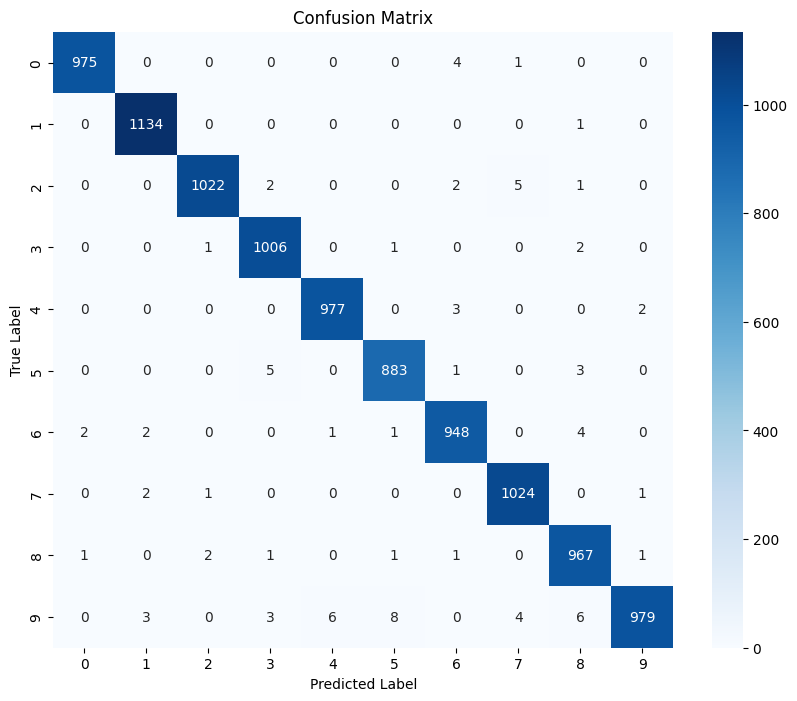

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()